# Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation and Analysis
import pandas as pd
import numpy as np
import math

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Processing
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from imblearn.over_sampling import SMOTE
from collections import Counter

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

# Pipeline
from sklearn.pipeline import Pipeline
import joblib


In [2]:
pip install imbalanced-learn

In [3]:
!pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.8 MB/s eta 0:00:00


# Importing Dataset

In [4]:
# Menghubungkan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path file CSV di Google Drive
file_path = '/content/drive/My Drive/PBI Home Credit/home-credit-default-risk/application_train.csv'

# Membaca file CSV menggunakan pandas
df = pd.read_csv(file_path)

Mounted at /content/drive


In [5]:
# Mengatur opsi tampilan
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.expand_frame_repr', False)  # Mencegah pemotongan tampilan
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

Ringkasan DataFrame
  - Total Entri: 307,511
  - Total Kolom: 122
  - Tipe Data:
    - int64: 41 kolom
    - float64: 65 kolom
    - object: 16 kolom

# 1. Exploratory Data Analysis

In [7]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 1.1 Univariate Analysis

### 1.1.1. Repayment Abilities

- Analyze the loan repayment status based on the target variable.

In [8]:
repayment_abilities = df['TARGET'].value_counts().reset_index()
repayment_abilities.columns = ['Repayment Status', 'Number of Customers']
repayment_abilities['Percentage'] = (repayment_abilities['Number of Customers'] / repayment_abilities['Number of Customers'].sum()) * 100
repayment_abilities['Repayment Status'] = repayment_abilities['Repayment Status'].map({0: 'Repaid', 1: 'Not Repaid'})


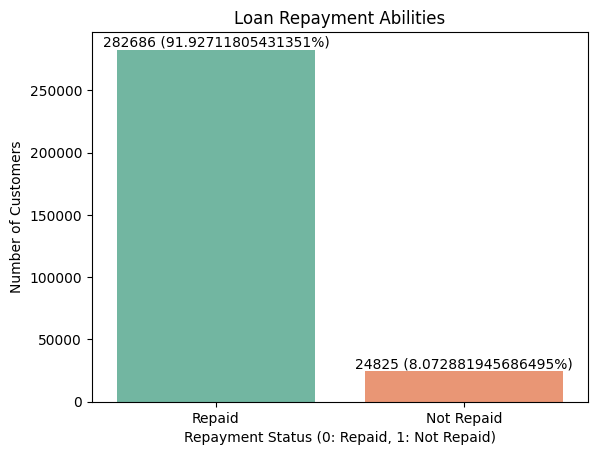

In [9]:
sns.barplot(x='Repayment Status', y='Number of Customers', data=repayment_abilities, palette='Set2')
plt.title('Loan Repayment Abilities')
plt.xlabel('Repayment Status (0: Repaid, 1: Not Repaid)')
plt.ylabel('Number of Customers')
for i in range(repayment_abilities.shape[0]):
    plt.text(i, repayment_abilities['Number of Customers'].iloc[i],
             f"{repayment_abilities['Number of Customers'].iloc[i]} ({repayment_abilities['Percentage'].iloc[i]}%)",
             ha='center', va='bottom')
plt.show()

### 1.1.2. Contract Type

- Explore the distribution of loan types among customers.

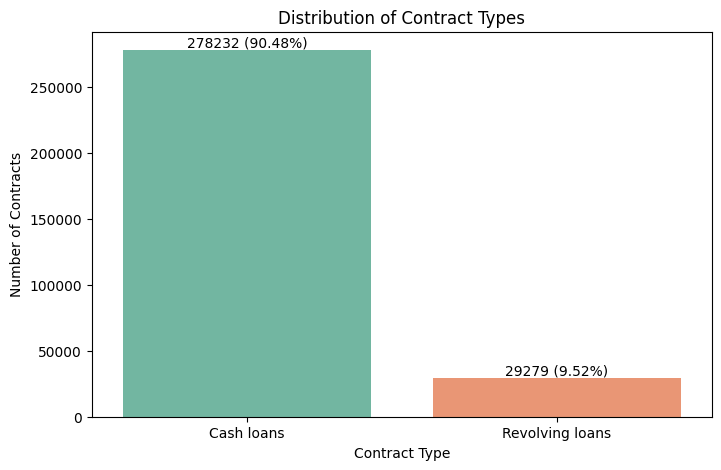

In [10]:
contract_type = df.groupby('NAME_CONTRACT_TYPE')['SK_ID_CURR'].count().reset_index()
contract_type.rename(columns={'SK_ID_CURR': 'Number of Contracts'}, inplace=True)
contract_type['Percentage'] = round(contract_type['Number of Contracts'] / contract_type['Number of Contracts'].sum() * 100, 2)
plt.figure(figsize=(8, 5))
sns.barplot(x='NAME_CONTRACT_TYPE', y='Number of Contracts', data=contract_type, palette='Set2')
plt.title('Distribution of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Number of Contracts')
for i in range(contract_type.shape[0]):
    plt.text(i, contract_type['Number of Contracts'].iloc[i],
             f"{contract_type['Number of Contracts'].iloc[i]} ({contract_type['Percentage'].iloc[i]}%)",
             ha='center', va='bottom')
plt.show()

### 1.1.3. Suite Type
- Analyze the impact of suite types on loan repayment.

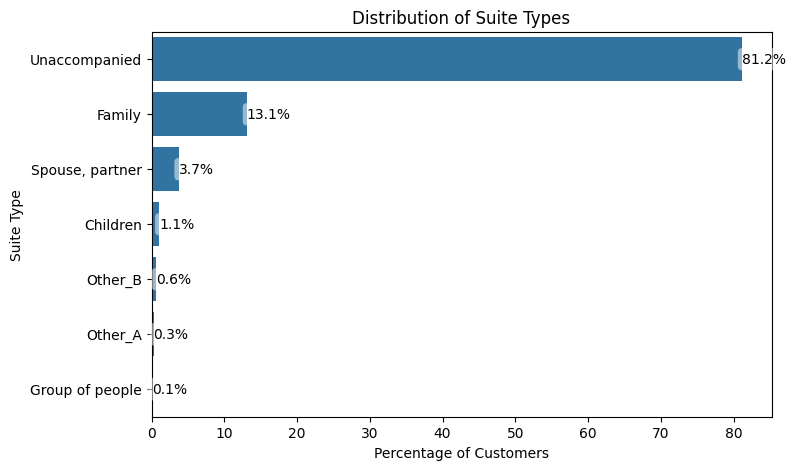

In [11]:
suite_type = df['NAME_TYPE_SUITE'].value_counts(normalize=True).reset_index()
suite_type.columns = ['NAME_TYPE_SUITE', 'Percentage']
suite_type['Percentage'] = suite_type['Percentage'] * 100  # Convert to percentage

plt.figure(figsize=(8, 5))
sns.barplot(x='Percentage', y='NAME_TYPE_SUITE', data=suite_type)
plt.title('Distribution of Suite Types')
plt.xlabel('Percentage of Customers')
plt.ylabel('Suite Type')
for i in range(suite_type.shape[0]):
    plt.text(suite_type['Percentage'].iloc[i], i,
             f"{suite_type['Percentage'].iloc[i]:.1f}%",
             ha='left', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))
plt.show()


### 1.1.4. Income Type
- Analyze the distribution of income types among applicants.

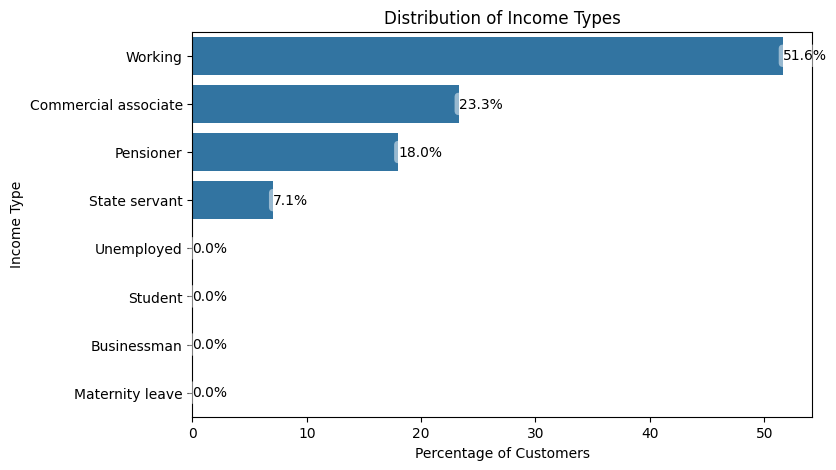

In [12]:
income_type = df['NAME_INCOME_TYPE'].value_counts(normalize=True).reset_index()
income_type.columns = ['NAME_INCOME_TYPE', 'Percentage']
income_type['Percentage'] = income_type['Percentage'] * 100  # Convert to percentage

plt.figure(figsize=(8, 5))
sns.barplot(x='Percentage', y='NAME_INCOME_TYPE', data=income_type)
plt.title('Distribution of Income Types')
plt.xlabel('Percentage of Customers')
plt.ylabel('Income Type')
for i in range(income_type.shape[0]):
    plt.text(income_type['Percentage'].iloc[i], i,
             f"{income_type['Percentage'].iloc[i]:.1f}%",
             ha='left', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))
plt.show()


### 1.1.5. Occupation
- Analyze the distribution of occupations among loan applicants.

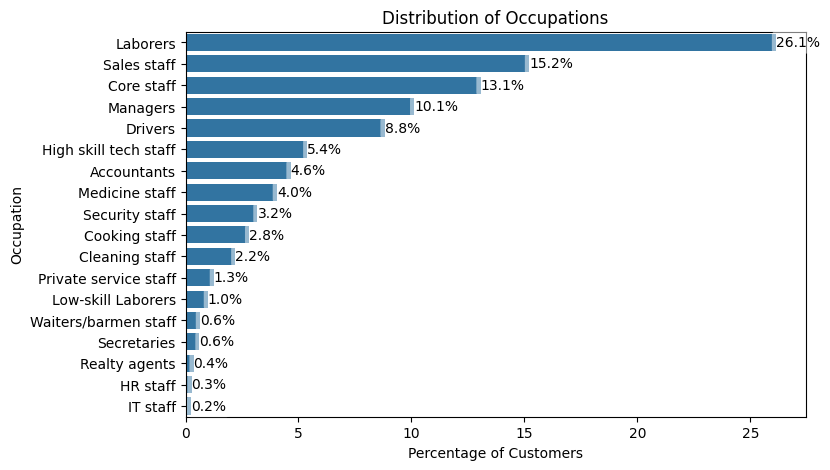

In [13]:
occupation = df['OCCUPATION_TYPE'].value_counts(normalize=True).reset_index()
occupation.columns = ['OCCUPATION_TYPE', 'Percentage']
occupation['Percentage'] = occupation['Percentage'] * 100  # Convert to percentage

plt.figure(figsize=(8, 5))
sns.barplot(x='Percentage', y='OCCUPATION_TYPE', data=occupation)
plt.title('Distribution of Occupations')
plt.xlabel('Percentage of Customers')
plt.ylabel('Occupation')
for i in range(occupation.shape[0]):
    plt.text(occupation['Percentage'].iloc[i], i,
             f"{occupation['Percentage'].iloc[i]:.1f}%",
             ha='left', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))
plt.show()


### 1.1.6. Education
- Analyze the distribution of education levels among applicants.

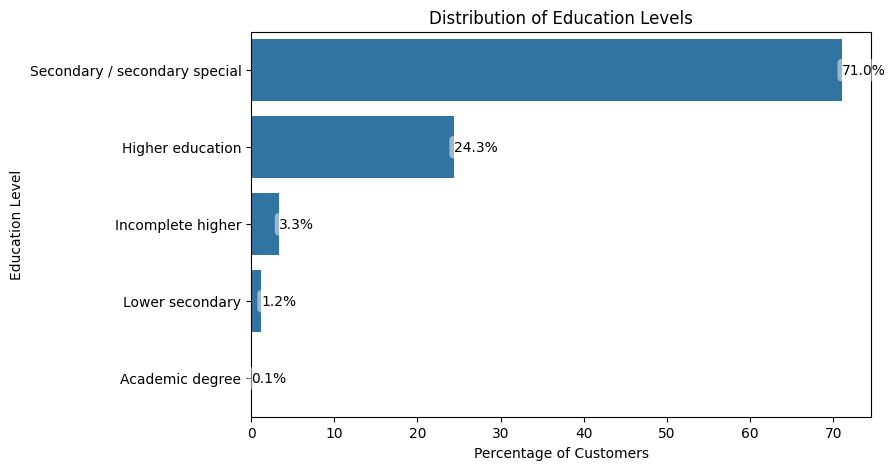

In [14]:
education = df['NAME_EDUCATION_TYPE'].value_counts(normalize=True).reset_index()
education.columns = ['NAME_EDUCATION_TYPE', 'Percentage']
education['Percentage'] = education['Percentage'] * 100  # Convert to percentage

plt.figure(figsize=(8, 5))
sns.barplot(x='Percentage', y='NAME_EDUCATION_TYPE', data=education)
plt.title('Distribution of Education Levels')
plt.xlabel('Percentage of Customers')
plt.ylabel('Education Level')
for i in range(education.shape[0]):
    plt.text(education['Percentage'].iloc[i], i,
             f"{education['Percentage'].iloc[i]:.1f}%",
             ha='left', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))
plt.show()


### 1.1.7. Housing Type
- Analyze the distribution of housing types among loan applicants.

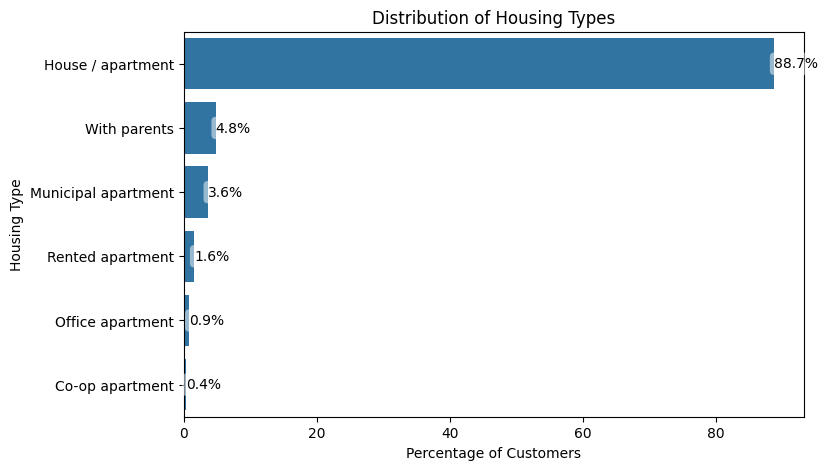

In [15]:
housing_type = df['NAME_HOUSING_TYPE'].value_counts(normalize=True).reset_index()
housing_type.columns = ['NAME_HOUSING_TYPE', 'Percentage']
housing_type['Percentage'] = housing_type['Percentage'] * 100  # Convert to percentage

plt.figure(figsize=(8, 5))
sns.barplot(x='Percentage', y='NAME_HOUSING_TYPE', data=housing_type)
plt.title('Distribution of Housing Types')
plt.xlabel('Percentage of Customers')
plt.ylabel('Housing Type')
for i in range(housing_type.shape[0]):
    plt.text(housing_type['Percentage'].iloc[i], i,
             f"{housing_type['Percentage'].iloc[i]:.1f}%",
             ha='left', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))
plt.show()

### 1.1.8. Gender
- Analyze the gender distribution among loan applicants.

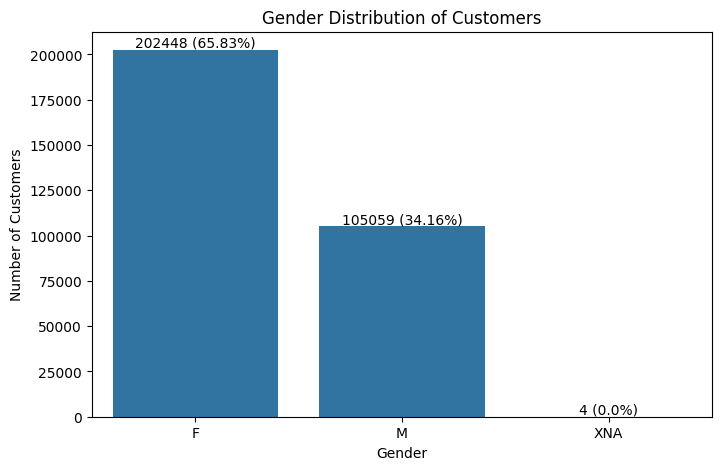

In [16]:
gender = df.groupby('CODE_GENDER')['SK_ID_CURR'].count().reset_index()
gender.rename(columns={'SK_ID_CURR': 'Number of Customers'}, inplace=True)
gender['Percentage'] = round(gender['Number of Customers'] / gender['Number of Customers'].sum() * 100, 2)

plt.figure(figsize=(8, 5))
sns.barplot(x='CODE_GENDER', y='Number of Customers', data=gender)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
for i in range(gender.shape[0]):
    plt.text(i, gender['Number of Customers'].iloc[i],
             f"{gender['Number of Customers'].iloc[i]} ({gender['Percentage'].iloc[i]}%)",
             ha='center', va='bottom')
plt.show()

## 1.2 Bivariate Analysis

### 1.2.1. Flag Own Realty and Flag Own Car
- Analyze the relationship between asset ownership and loan repayment.

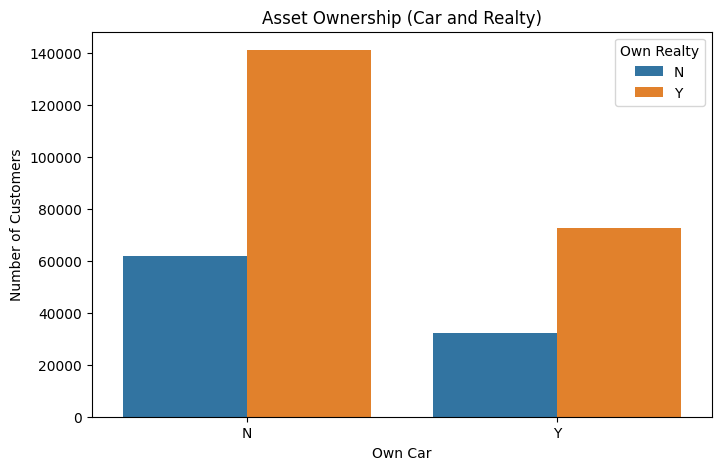

In [17]:
own_assets = df.groupby(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY'])['SK_ID_CURR'].count().reset_index()
own_assets.rename(columns={'SK_ID_CURR': 'Number of Customers'}, inplace=True)
own_assets['Percentage'] = round(own_assets['Number of Customers'] / own_assets['Number of Customers'].sum() * 100, 2)

plt.figure(figsize=(8, 5))
sns.barplot(x='FLAG_OWN_CAR', y='Number of Customers', hue='FLAG_OWN_REALTY', data=own_assets)
plt.title('Asset Ownership (Car and Realty)')
plt.xlabel('Own Car')
plt.ylabel('Number of Customers')
plt.legend(title='Own Realty')
plt.show()

### 1.2.2. Repayment Abilities vs. Annuity Amount
- Examine how loan repayment status relates to the annuity amount.

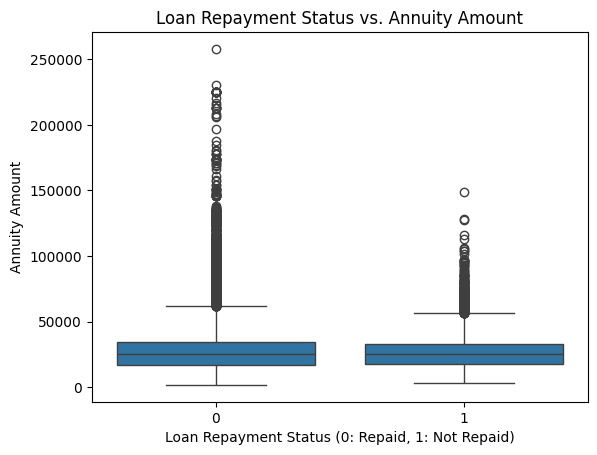

In [18]:
sns.boxplot(x='TARGET', y='AMT_ANNUITY', data=df)
plt.title('Loan Repayment Status vs. Annuity Amount')
plt.xlabel('Loan Repayment Status (0: Repaid, 1: Not Repaid)')
plt.ylabel('Annuity Amount')
plt.show()

### 1.2.3. Repayment Status by Contract Type
- Investigate repayment status across different contract types.

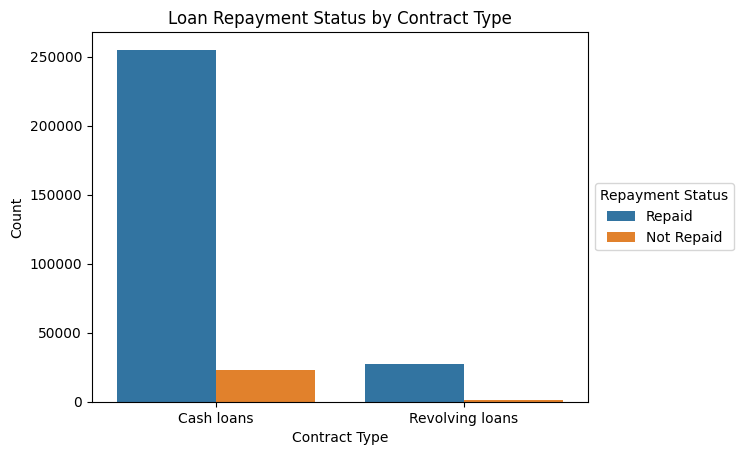

In [19]:
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=df)
plt.title('Loan Repayment Status by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Repayment Status', labels=['Repaid', 'Not Repaid'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=0)
plt.show()

### 1.2.4 Repayment Status by Income Type
- Explore how income type impacts repayment status.

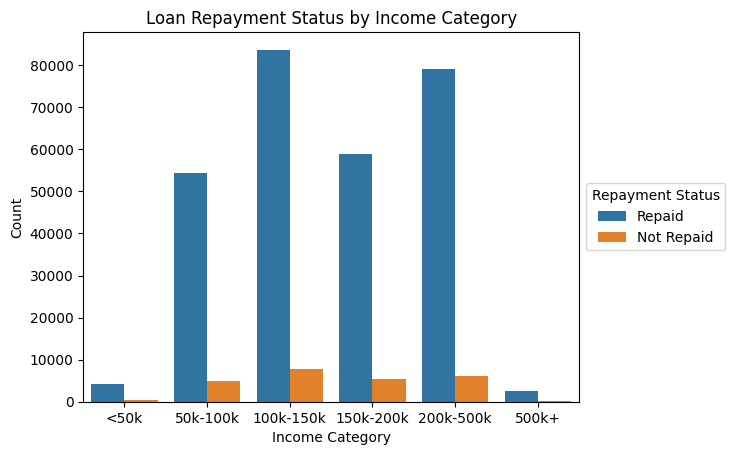

In [20]:
bins = [0, 50000, 100000, 150000, 200000, 500000, float('inf')]
labels = ['<50k', '50k-100k', '100k-150k', '150k-200k', '200k-500k', '500k+']
df['Income_Category'] = pd.cut(df['AMT_INCOME_TOTAL'], bins=bins, labels=labels)
sns.countplot(x='Income_Category', hue='TARGET', data=df)
plt.title('Loan Repayment Status by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.legend(title='Repayment Status', labels=['Repaid', 'Not Repaid'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=0)
plt.show()

Insights:
- Income above 500k: Borrowers with an income above 500k have the lowest count of both repaid and not repaid loans, indicating that fewer high-income earners apply for loans.
- 100k-150k and 200k-500k categories: These categories have the highest number of loan applicants, with a significant proportion repaid, suggesting these income brackets are common among the loan customer base and generally exhibit good repayment behavior.

### 1.2.5 Repayment Status by Occupation
- Analyze how repayment status varies across different occupations.

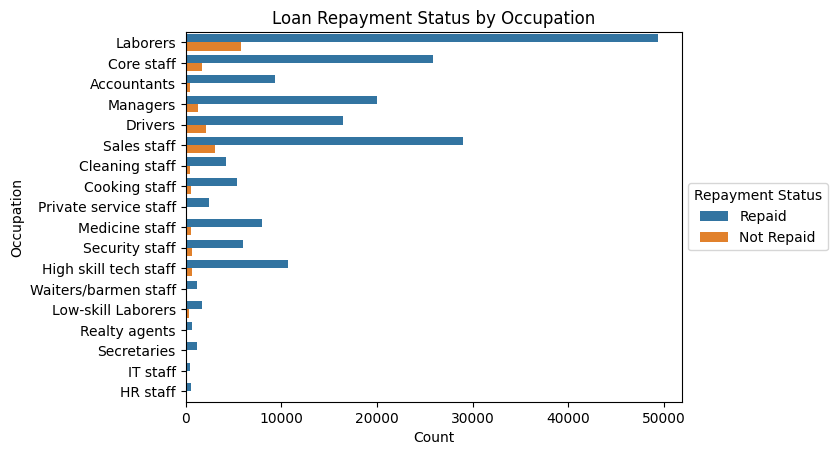

In [21]:
sns.countplot(y='OCCUPATION_TYPE', hue='TARGET', data=df)
plt.title('Loan Repayment Status by Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.legend(title='Repayment Status', labels=['Repaid', 'Not Repaid'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Insights:
- Laborers have the highest count of loan applicants, both in the repaid and not repaid categories. This suggests that Laborers are a significant segment of the loan customer base.
- Sales staff and Drivers also represent large portions of the loan applicant pool, indicating that these professions are commonly applying for and repaying loans.

### 1.2.6. Repayment Status by Education Level
- Investigate the relationship between education level and repayment status.

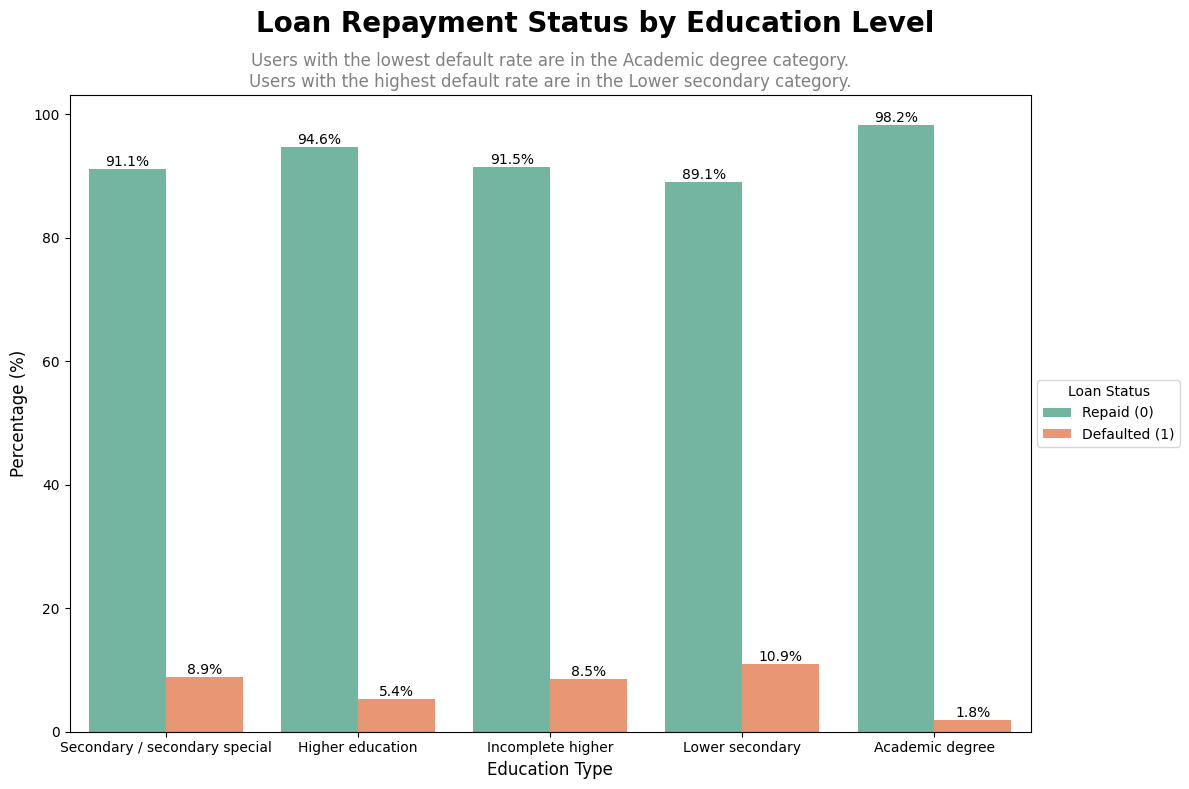

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='NAME_EDUCATION_TYPE', y='percentage', hue='TARGET', data=df_grouped, palette='Set2')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.xticks(rotation=0, ha='center')

plt.suptitle('Loan Repayment Status by Education Level', fontsize=20, fontweight='bold')
plt.title('Users with the lowest default rate are in the Academic degree category.\n'
          'Users with the highest default rate are in the Lower secondary category.', fontsize=12, color='gray')

plt.xlabel('Education Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Repaid (0)', 'Defaulted (1)'], title='Loan Status', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


### 1.2.7.  Repayment Status by Housing Type
- Explore how housing type affects repayment status.

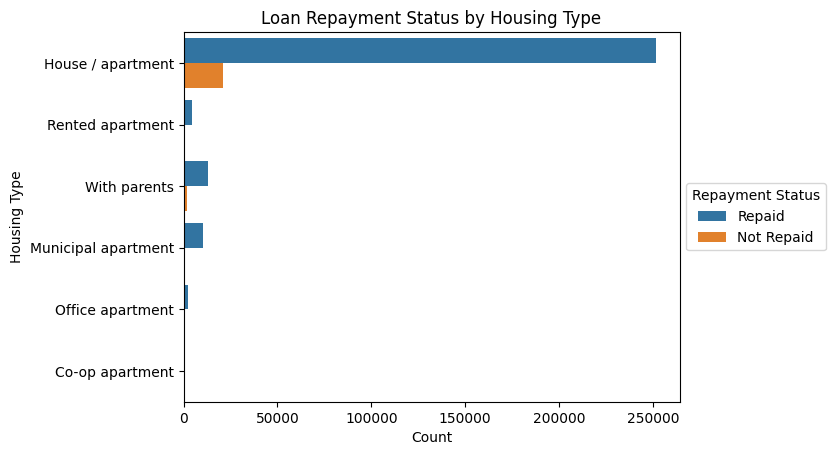

In [23]:
sns.countplot(y='NAME_HOUSING_TYPE', hue='TARGET', data=df)
plt.title('Loan Repayment Status by Housing Type')
plt.xlabel('Count')
plt.ylabel('Housing Type')
plt.legend(title='Repayment Status', labels=['Repaid', 'Not Repaid'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### 1.2.8. Repayment Status by Gender
- Assess repayment status across different genders.

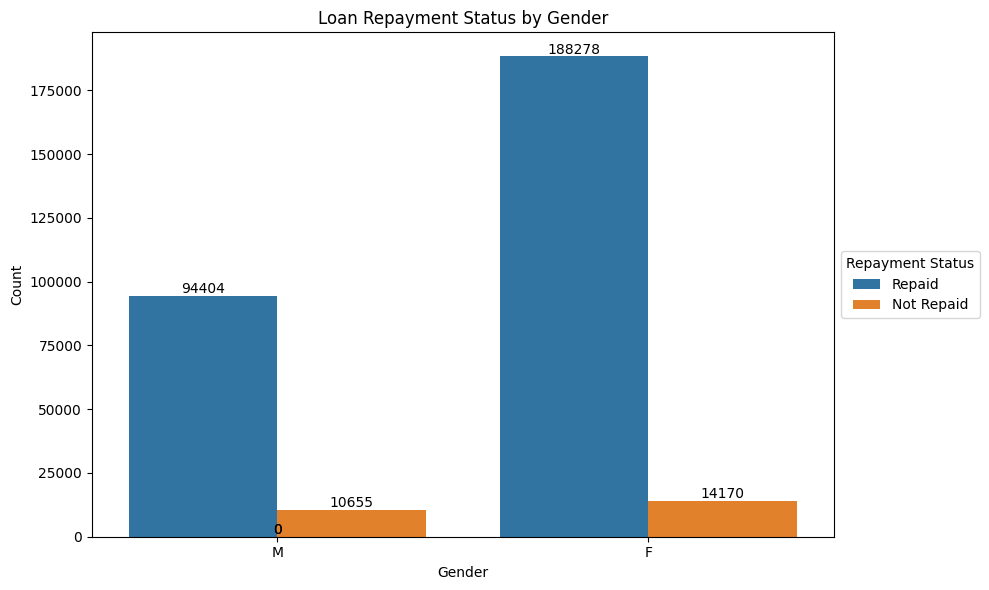

In [24]:
filtered_df = df[df['CODE_GENDER'] != 'XNA']

# Create the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CODE_GENDER', hue='TARGET', data=filtered_df)
plt.title('Loan Repayment Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Repayment Status', labels=['Repaid', 'Not Repaid'], loc='center left', bbox_to_anchor=(1, 0.5))

# Annotate each bar with the actual count
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1000, f'{int(height)}', ha='center')

plt.tight_layout()
plt.show()

Insight:
- While there are more female borrowers, a significant proportion of both genders have not repaid their loans. Although the number of male borrowers is smaller, the proportion of non-repayment among men is substantial and closely approaches that of women.

### 1.2.9. Repayment Status vs. Age
- Investigate the relationship between age and repayment status.

In [25]:
df['AGE'] = -df['DAYS_BIRTH'] // 365

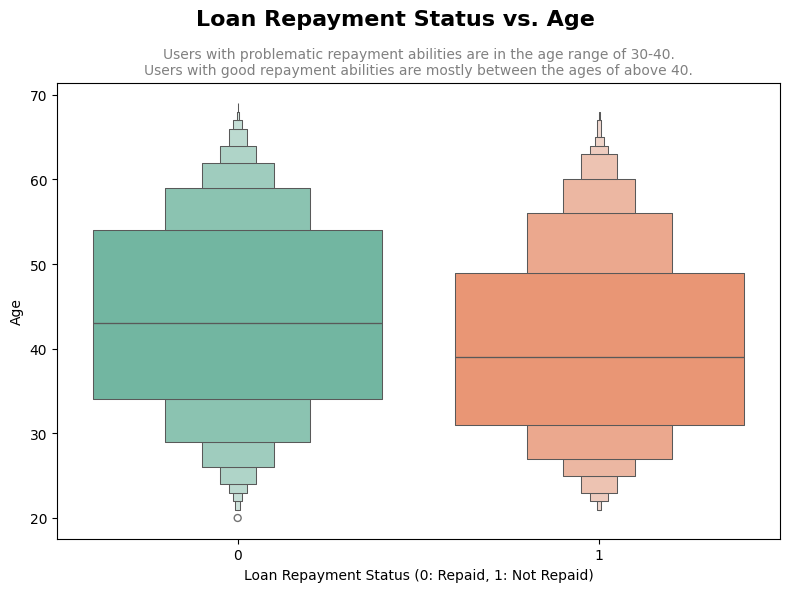

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxen plot
plt.figure(figsize=(8, 6))
sns.boxenplot(x='TARGET', y='AGE', data=df, palette='Set2')

# Add main title and updated subtitle
plt.suptitle('Loan Repayment Status vs. Age', fontsize=16, fontweight='bold')
plt.title('Users with problematic repayment abilities are in the age range of 30-40.\n'
          'Users with good repayment abilities are mostly between the ages of above 40.',
          fontsize=10, color='gray')

# Add axis labels
plt.xlabel('Loan Repayment Status (0: Repaid, 1: Not Repaid)')
plt.ylabel('Age')

# Show the plot
plt.tight_layout()
plt.show()



Insights:
- Users under 30 show a slightly wider distribution in the "Not Repaid" category, suggesting younger borrowers might have a higher risk of defaulting on loans.

### 1.2.10 Total Users by Income Type and Acceptance Status

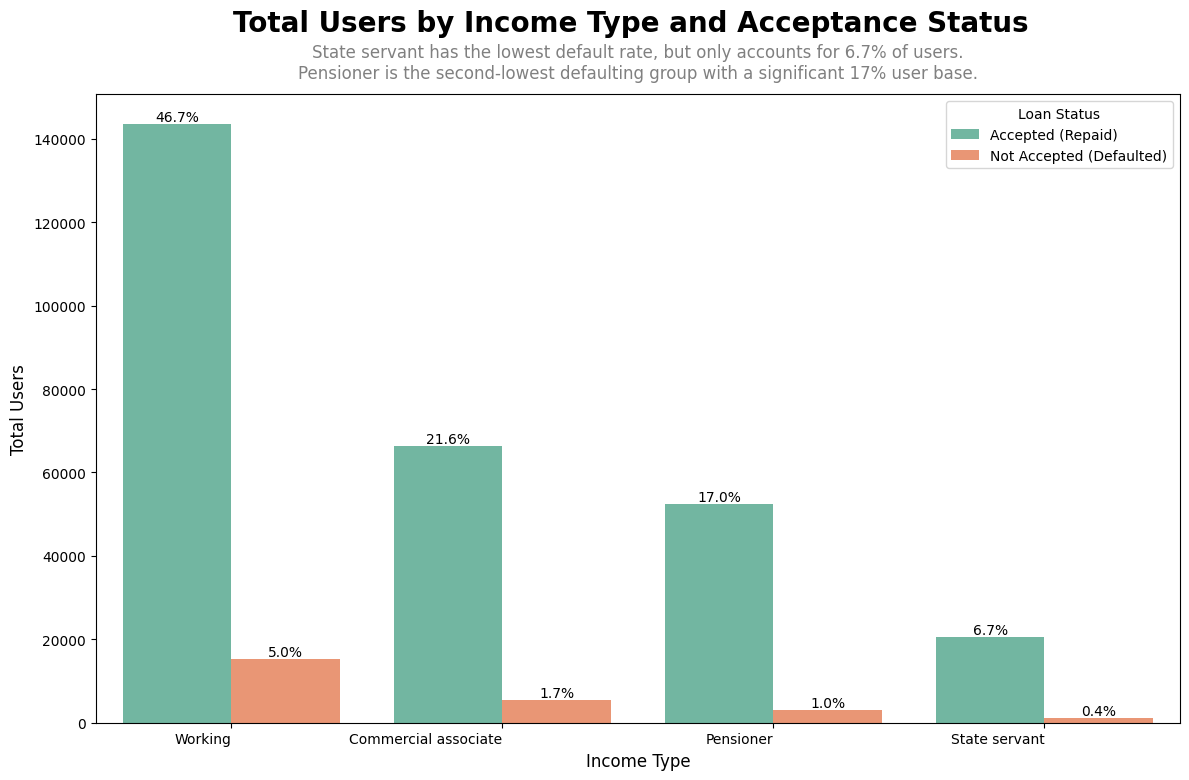

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[~df['NAME_INCOME_TYPE'].isin(['Unemployed', 'Student', 'Businessman', 'Maternity leave'])]
df_grouped = df_filtered.groupby(['NAME_INCOME_TYPE', 'TARGET']).size().reset_index(name='count')
df_total_users = df_grouped.groupby('NAME_INCOME_TYPE')['count'].sum().reset_index().rename(columns={'count': 'total_users'})
df_grouped = df_grouped.merge(df_total_users, on='NAME_INCOME_TYPE')
df_grouped = df_grouped.sort_values('total_users', ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='NAME_INCOME_TYPE', y='count', hue='TARGET', data=df_grouped, palette='Set2')

total_users = len(df_filtered)
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total_users
    if percentage > 0:
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.suptitle('Total Users by Income Type and Acceptance Status', fontsize=20, fontweight='bold', x=0.53, y=0.97)
plt.text(
    x=0.5, y=1.02, s='State servant has the lowest default rate, but only accounts for 6.7% of users.\n'
                    'Pensioner is the second-lowest defaulting group with a significant 17% user base.',
    fontsize=12, color='gray', ha='center', va='bottom', transform=ax.transAxes
)

plt.xlabel('Income Type', fontsize=12)
plt.ylabel('Total Users', fontsize=12)

# Correct the legend to match the hue in the plot
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Accepted (Repaid)', 'Not Accepted (Defaulted)'], title='Loan Status')

plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


### 1.2.11 Total Users by Occupation and Default Rate

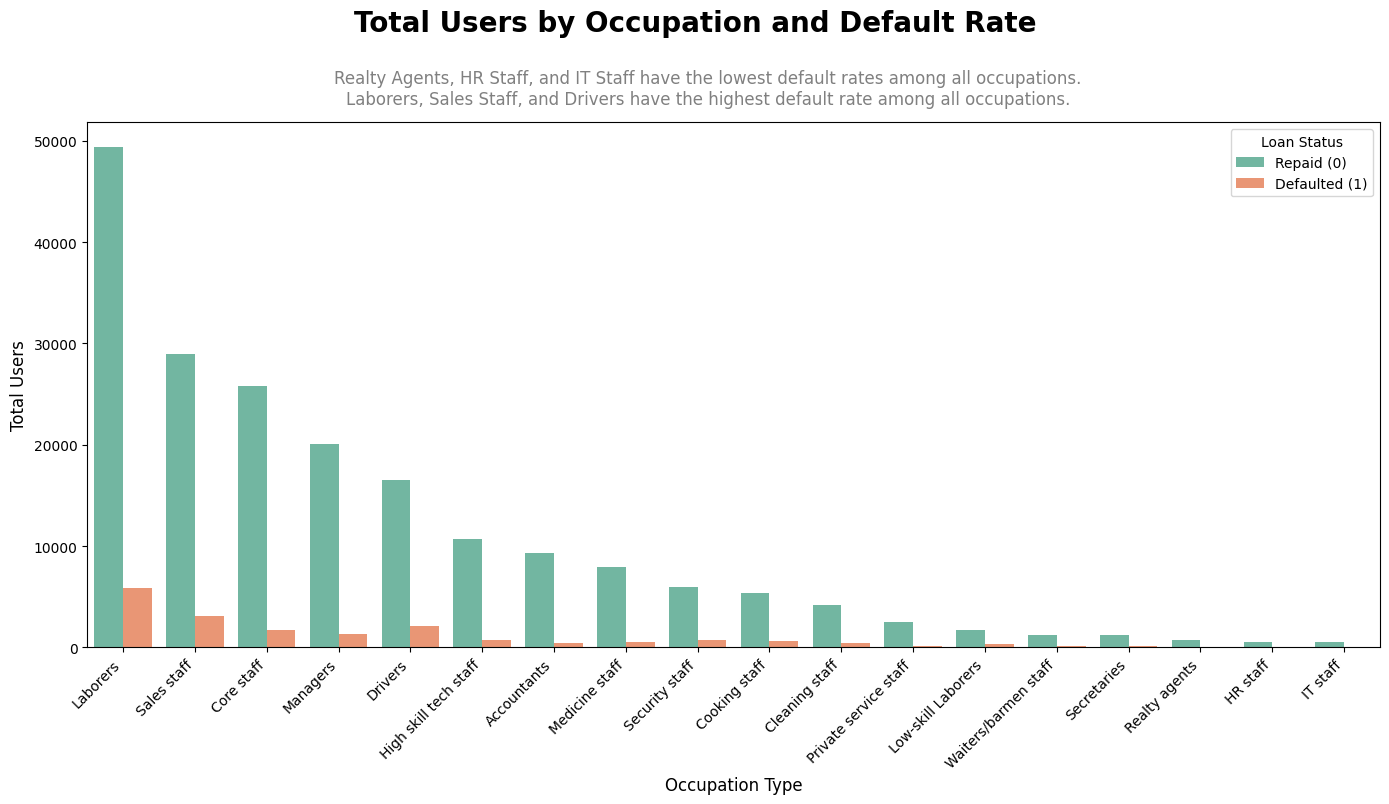

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

df_grouped = df.groupby(['OCCUPATION_TYPE', 'TARGET']).size().reset_index(name='count')
df_total_users = df_grouped.groupby('OCCUPATION_TYPE')['count'].sum().reset_index().rename(columns={'count': 'total_users'})
df_grouped = df_grouped.merge(df_total_users, on='OCCUPATION_TYPE')
df_grouped = df_grouped.sort_values('total_users', ascending=False)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='OCCUPATION_TYPE', y='count', hue='TARGET', data=df_grouped, palette='Set2')

plt.suptitle('Total Users by Occupation and Default Rate', fontsize=20, fontweight='bold', y=1)
plt.title('Realty Agents, HR Staff, and IT Staff have the lowest default rates among all occupations.\n'
          'Laborers, Sales Staff, and Drivers have the highest default rate among all occupations.',
          fontsize=12, y=1.02, x=0.48, color='gray', ha='center')

plt.xlabel('Occupation Type', fontsize=12)
plt.ylabel('Total Users', fontsize=12)
plt.xticks(rotation=45, ha='right')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, title='Loan Status', labels=['Repaid (0)', 'Defaulted (1)'])

plt.tight_layout()
plt.show()


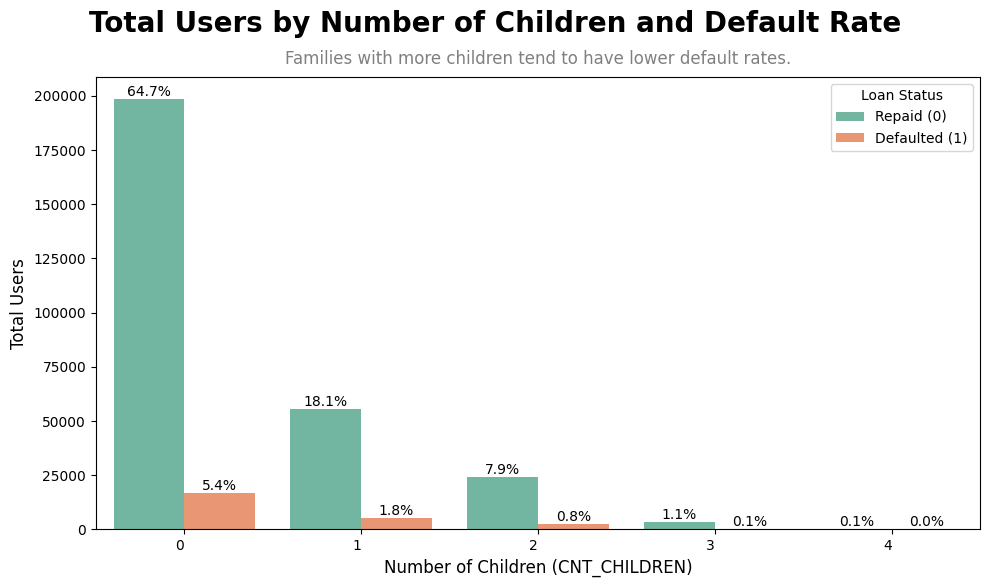

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data to include only users with 0 to 4 children
df_filtered = df[df['CNT_CHILDREN'].between(0, 4)]

# Group the data by Number of Children and Default Status (TARGET) and calculate the total count
df_grouped = df_filtered.groupby(['CNT_CHILDREN', 'TARGET']).size().reset_index(name='count')

# Calculate the total number of users in the filtered data
total_users = df_filtered.shape[0]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the double bar plot for each number of children, with default status as hue
ax = sns.barplot(x='CNT_CHILDREN', y='count', hue='TARGET', data=df_grouped, palette='Set2')

# Add titles and labels
plt.suptitle('Total Users by Number of Children and Default Rate', fontsize=20, fontweight='bold', y=0.97)
plt.title('Families with more children tend to have lower default rates.', fontsize=12, color='gray', y=1.01)

plt.xlabel('Number of Children (CNT_CHILDREN)', fontsize=12)
plt.ylabel('Total Users', fontsize=12)

# Annotate the bars with percentages
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total_users
    if height > 0:
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Fix the legend to display colors correctly
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, title='Loan Status', labels=['Repaid (0)', 'Defaulted (1)'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


## 1.3 Multivariate Analysis

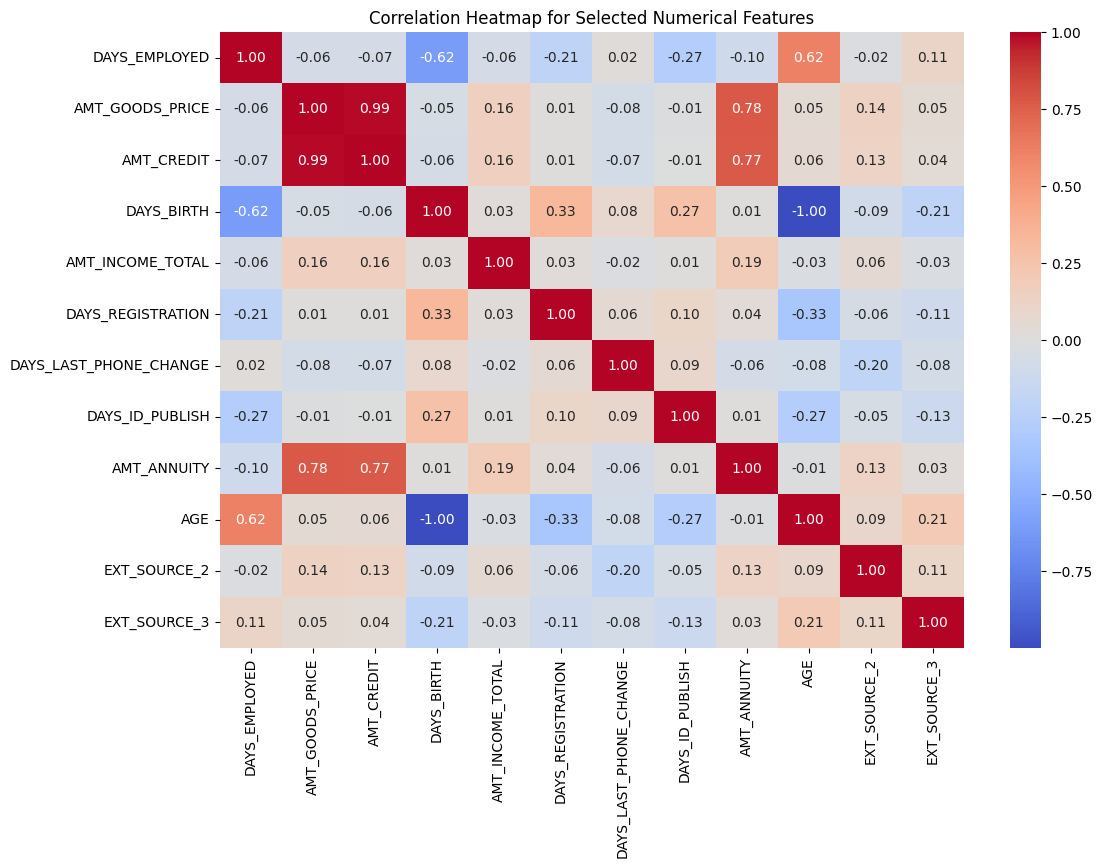

In [36]:
selected_numerical_features = [
    'DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL',
    'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 'AGE',
    'EXT_SOURCE_2', 'EXT_SOURCE_3'
]

# Membuat matriks korelasi dari fitur-fitur numerik yang dipilih
correlation_matrix = df[selected_numerical_features].corr()

# Plot heatmap untuk visualisasi korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Selected Numerical Features')
plt.show()


## 1.4 Statistics Descriptive

In [37]:
# Pengelompokkan Feature
num = df.select_dtypes(include=['float64', 'int64']).columns  # Fitur Numerik
cat = df.select_dtypes(include=['object']).columns  # Fitur Kategorikal

In [38]:
pd.set_option('display.max_rows', None)  # Tampilkan semua baris
pd.set_option('display.max_columns', None)  # Tampilkan semua kolom
pd.set_option('display.width', None)  # Biarkan lebar kolom sesuai kebutuhan
pd.set_option('display.max_colwidth', None)  # Tampilkan semua konten kolom

### 1.4.1 Feature Numerical

In [39]:
for column in num:
    print(f"Values for column '{column}':")
    print(df[column].unique())  # Tampilkan semua nilai unik
    print("\n")

Values for column 'SK_ID_CURR':
[100002 100003 100004 ... 456253 456254 456255]


Values for column 'TARGET':
[1 0]


Values for column 'CNT_CHILDREN':
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]


Values for column 'AMT_INCOME_TOTAL':
[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]


Values for column 'AMT_CREDIT':
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]


Values for column 'AMT_ANNUITY':
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]


Values for column 'AMT_GOODS_PRICE':
[ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]


Values for column 'REGION_POPULATION_RELATIVE':
[0.018801 0.003541 0.010032 0.008019 0.028663 0.035792 0.003122 0.018634
 0.019689 0.0228   0.015221 0.031329 0.016612 0.010006 0.020713 0.010966
 0.04622  0.025164 0.006296 0.026392 0.018029 0.019101 0.030755 0.008575
 0.01885  0.006207 0.009175 0.007305 0.007114 0.009334 0.022625 0.01452
 0.006629 0.00733  0.032561 0.00496  0.072508 0.009657 0.02461  0.

In [40]:
# Deskripsi Feature Numerical
df[num].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.11

Insights:
- Loan Amount: The average loan amount is 599,026, with most loans ranging between 270,000 and 808,650.

- Income: The average annual income of the applicants is 168,798, with most applicants having incomes between 112,500 and 202,500. There are a few outliers with very high incomes, reaching up to 117,000,000.

- Annuity: The average annuity payment is 27,109, with a minimum of 1,616 and a maximum of 258,026.

- Age: The average age of the applicants is 43 years, with the youngest being 20 years and the oldest 69 years.

- Children: Most applicants have no children, with an average of 0.42 children per applicant. The maximum number of children is 19, though such cases are rare.

- Days Employed: The average number of days employed is 63,815 days, but there are likely anomalies, such as negative values.

- Days Since Last Phone Change: The average time since the last phone change is -963 days, indicating some potential data errors with negative values.

- Credit Bureau Requests: The average number of credit bureau requests in the last year is 1.9, with a maximum of 261 requests, indicating some applicants have had a high frequency of credit checks.

### 1.4.2 Feature Category

In [41]:
for column in cat:
    print(f"Values for column '{column}':")
    print(df[column].unique())  # Tampilkan semua nilai unik
    print("\n")

Values for column 'NAME_CONTRACT_TYPE':
['Cash loans' 'Revolving loans']


Values for column 'CODE_GENDER':
['M' 'F' 'XNA']


Values for column 'FLAG_OWN_CAR':
['N' 'Y']


Values for column 'FLAG_OWN_REALTY':
['Y' 'N']


Values for column 'NAME_TYPE_SUITE':
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']


Values for column 'NAME_INCOME_TYPE':
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']


Values for column 'NAME_EDUCATION_TYPE':
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


Values for column 'NAME_FAMILY_STATUS':
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']


Values for column 'NAME_HOUSING_TYPE':
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


Values for column 'OCCUPATION_TYPE':
['Laborers

In [42]:
# Deskripsi Feature Categorical
df[cat].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


Insights:
- Contract Type: The majority of loans are Cash loans (278,232 out of 307,511).

- Gender: Most applicants are Female (202,448 out of 307,511), indicating a larger share of loan applications from women.

- Car Ownership: 66% of applicants do not own a car (202,924 out of 307,511).

- Real Estate Ownership: About 69% of applicants own real estate (213,312 out of 307,511), suggesting many have stable assets.

- Income Type: The most common income source is Working (158,774 out of 307,511), with a large number of applicants being salaried workers.

- Education Level: The majority of applicants have completed Secondary education (218,391 out of 307,511), reflecting a moderately educated applicant base.

- Family Status: Married applicants represent the largest group (196,432 out of 307,511).

- Housing Type: Most applicants live in House / apartment (272,868 out of 307,511), indicating stable living conditions.

- Occupation: Laborers form the largest occupational group (55,186 out of 211,120), suggesting loans are commonly taken by manual labor workers.

- Application Day: Most applications are submitted on Tuesday (53,901 out of 307,511), with a steady flow throughout the weekdays.


# 2. Data Cleaning

## 2.1 Handle Missing Value

In [33]:
df.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,12


In [34]:
df_missing = df.copy()

### 2.1.1 Drop column with more than 50% Missing Value

In [35]:
threshold = 0.55 * len(df_missing)
df_cleaned = df.dropna(axis=1, thresh=threshold)

In [36]:
df_cleaned.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

### 2.1.2 Imputation Median for Numerical Feature

In [37]:
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)


### 2.1.3 Imputation Mode for Categorical Feature

In [38]:
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)


In [39]:
df_cleaned.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0


## 2.2 Handle Duplicated Data

In [40]:
df_cleaned.duplicated().any()

False

## 2.3 Handling Outliers

In [41]:
df_outlier = df_cleaned.copy()

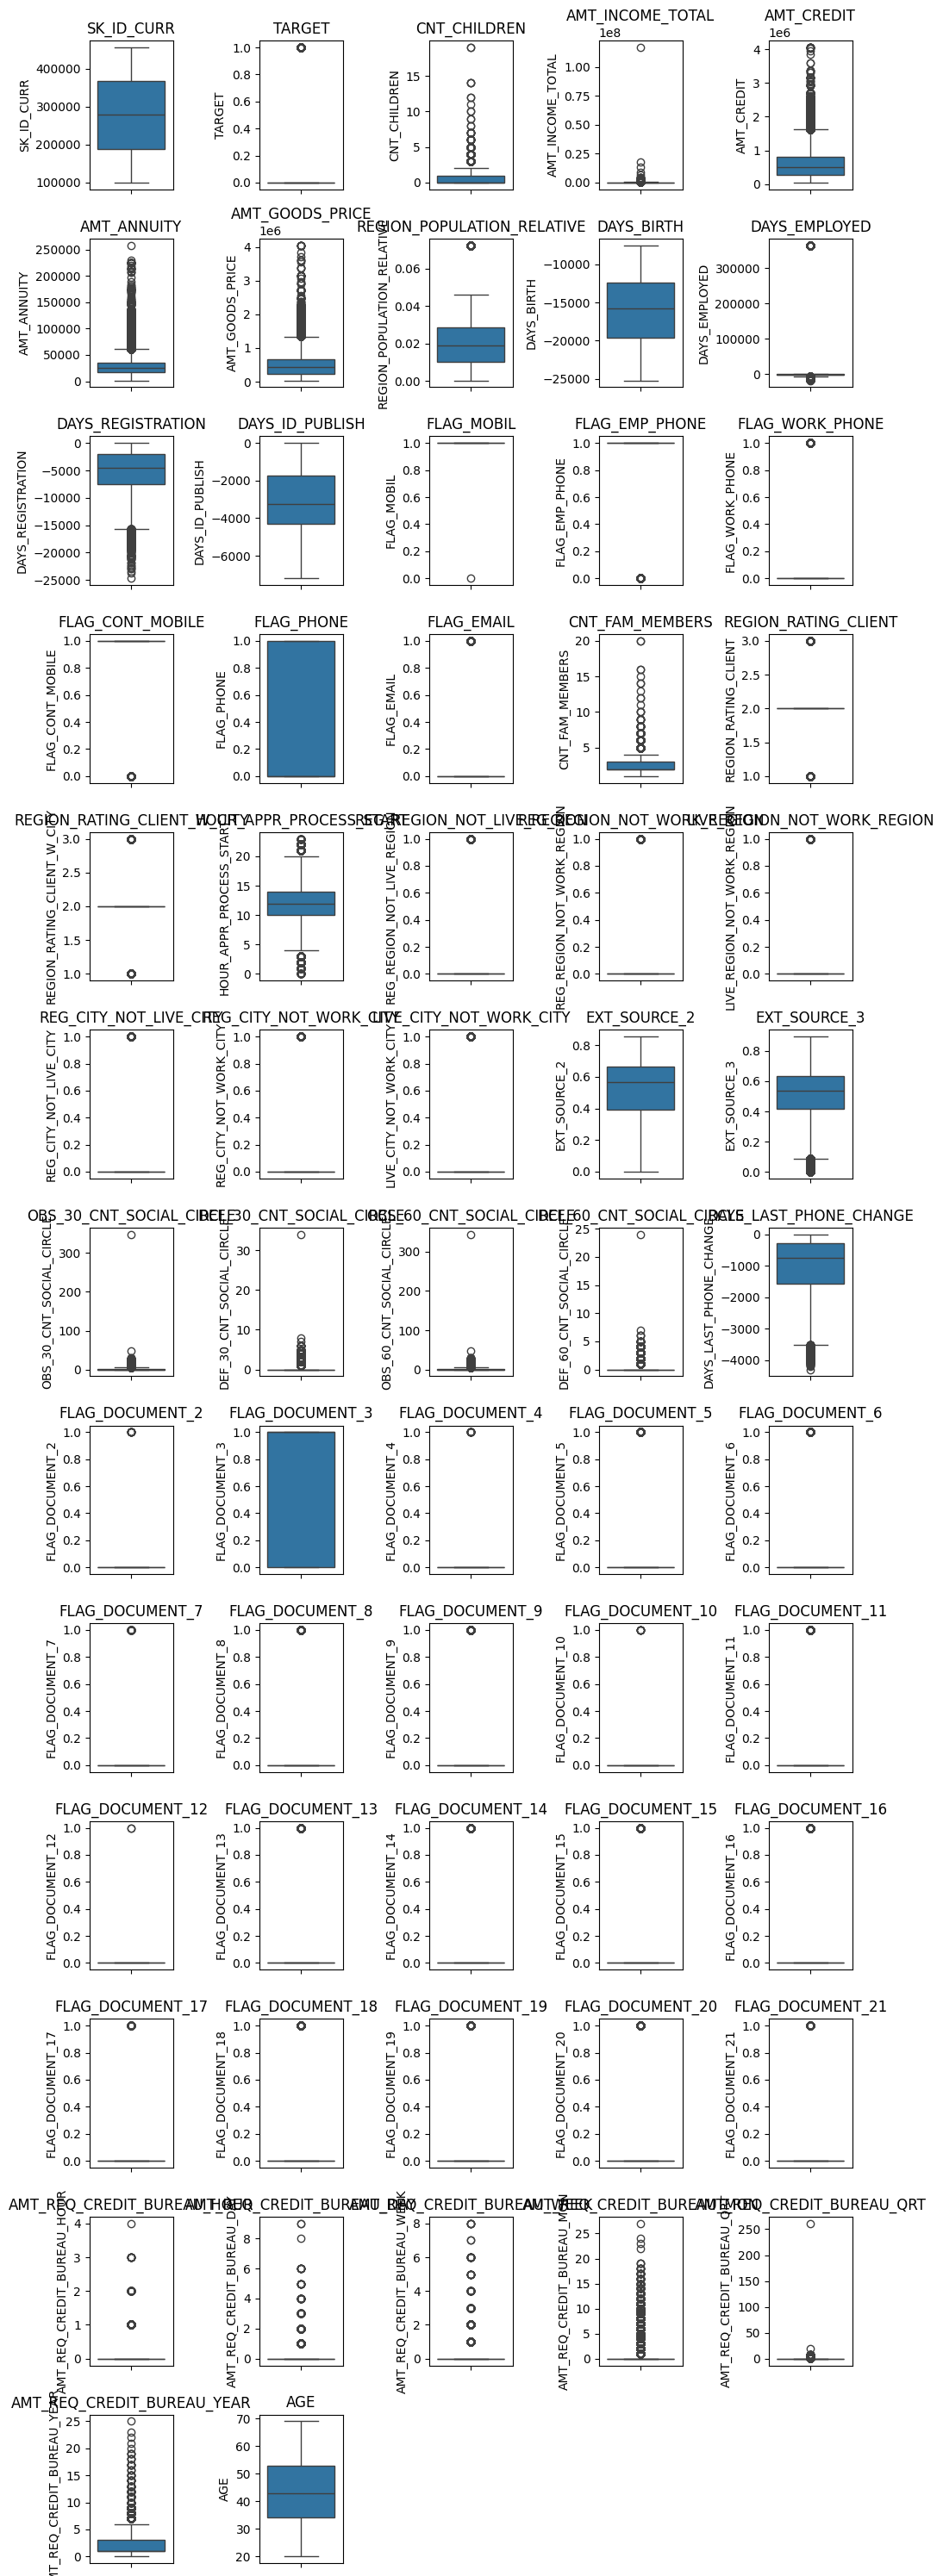

In [42]:
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 30))
num_cols = len(numeric_cols)
num_rows = (num_cols // 5) + (num_cols % 5 > 0)

for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 5, i + 1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [43]:
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs((df_cleaned[numeric_cols] - df_cleaned[numeric_cols].mean()) / df_cleaned[numeric_cols].std())
threshold = 3
outliers = (z_scores > threshold)
jumlah_sebelum = df_cleaned.shape[0]
df_no_outliers = df_cleaned[~outliers.any(axis=1)]
jumlah_setelah = df_no_outliers.shape[0]

print("Row before removing outliers:", jumlah_sebelum)
print("Row after removing outlier:", jumlah_setelah)


Row before removing outliers: 307511
Row after removing outlier: 155421


Due to the significant number of rows removed during filtering, it has been decided not to eliminate the outliers, as this could lead to the loss of valuable information

## 2.4 Handling Inappropriate Value

In [44]:
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
negative_features = numeric_cols[(df_cleaned[numeric_cols] < 0).any()].tolist()
print("Features with negative values:", negative_features)

Features with negative values: ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']


In [45]:
df_cleaned['DAYS_BIRTH'] = df_cleaned['DAYS_BIRTH'].abs()
df_cleaned['DAYS_EMPLOYED'] = df_cleaned['DAYS_EMPLOYED'].abs()
df_cleaned['DAYS_REGISTRATION'] = df_cleaned['DAYS_REGISTRATION'].abs()
df_cleaned['DAYS_ID_PUBLISH'] = df_cleaned['DAYS_ID_PUBLISH'].abs()
df_cleaned['DAYS_LAST_PHONE_CHANGE'] = df_cleaned['DAYS_LAST_PHONE_CHANGE'].abs()

## 2.5 Drop Unnecessary Column


In [46]:
df_cleaned = df_cleaned.drop(columns=['SK_ID_CURR'])

# 3. Feature Engineering

## 3.1 Feature Encoding

In [47]:
df_encoded = pd.get_dummies(df_cleaned, columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                                                  'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                                                  'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
                                                  'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                                  'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
                                                  'WEEKDAY_APPR_PROCESS_START',
                                                  'ORGANIZATION_TYPE'], drop_first=True)

In [48]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 174 entries, TARGET to ORGANIZATION_TYPE_XNA
dtypes: bool(112), category(1), float64(20), int64(41)
memory usage: 176.3 MB


## 3.2 Feature Selection




In [49]:
# Check for remaining non-numeric columns
non_numeric_cols = df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: ['Income_Category']


In [50]:
# One-hot encode the Income_Category column
df_encoded = pd.get_dummies(df_encoded, columns=['Income_Category'], drop_first=True)


In [51]:
# Define features and target
X = df_encoded.drop('TARGET', axis=1)
y = df_encoded['TARGET']

In [52]:
target_counts = df_encoded['TARGET'].value_counts()
print("Distribution of Loan Repayment Status:")
print(target_counts)


Distribution of Loan Repayment Status:
TARGET
0    282686
1     24825
Name: count, dtype: int64


In [53]:
# Feature selection using chi-squared
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)

# Create DataFrame for scores
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Combine feature names and scores
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
print(featureScores.sort_values(by=['Score'], ascending=False))


The features that correlate well with target feature:

                                              Features         Score
7                                        DAYS_EMPLOYED  1.954124e+08
4                                      AMT_GOODS_PRICE  1.223080e+08
2                                           AMT_CREDIT  7.669987e+07
6                                           DAYS_BIRTH  2.235391e+06
1                                     AMT_INCOME_TOTAL  1.624102e+06
8                                    DAYS_REGISTRATION  1.348566e+06
32                              DAYS_LAST_PHONE_CHANGE  6.656876e+05
9                                      DAYS_ID_PUBLISH  6.195946e+05
3                                          AMT_ANNUITY  3.913092e+05
59                                                 AGE  6.192591e+03
78                NAME_EDUCATION_TYPE_Higher education  7.451081e+02
24                              REG_CITY_NOT_WORK_CITY  6.153774e+02
61                                       CODE_GE

In [54]:
# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new distribution
print("Original dataset shape:", Counter(y))
print("Resampled dataset shape:", Counter(y_resampled))

Original dataset shape: Counter({0: 282686, 1: 24825})
Resampled dataset shape: Counter({1: 282686, 0: 282686})


## 3.3 Standardization

In [55]:
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# 4. Modelling

## 4.1 Splitting Data

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)
print("Number of samples in X_train:", X_train.shape[0])
print("Number of samples in y_train:", y_train.shape[0])

Number of samples in X_train: 452297
Number of samples in y_train: 452297


## 4.2 Function

In [58]:
import time

def evaluate_logreg(X_train, y_train, X_test, y_test):
    start_time = time.time()
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    print('**Logistic Regression Evaluation Metrics**')
    print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred_test), 4)}')
    print(f'Precision Score: {round(precision_score(y_test, y_pred_test), 4)}')
    print(f'Recall Score: {round(recall_score(y_test, y_pred_test), 4)}')
    print(f'F1 Score: {round(f1_score(y_test, y_pred_test), 4)}')
    print(f'ROC-AUC Score Test: {round(roc_auc_score(y_test, y_pred_proba_test), 6)}\n')

    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Repaid', 'Not Repaid'], yticklabels=['Repaid', 'Not Repaid'])
    plt.title('Confusion Matrix - Logistic Regression')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(f"Elapsed Time: {time.time() - start_time:.2f} seconds\n")

def evaluate_dt(X_train, y_train, X_test, y_test):
    start_time = time.time()
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    print('**Decision Tree Evaluation Metrics**')
    print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred_test), 4)}')
    print(f'Precision Score: {round(precision_score(y_test, y_pred_test), 4)}')
    print(f'Recall Score: {round(recall_score(y_test, y_pred_test), 4)}')
    print(f'F1 Score: {round(f1_score(y_test, y_pred_test), 4)}')
    print(f'ROC-AUC Score Test: {round(roc_auc_score(y_test, y_pred_proba_test), 6)}\n')

    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Repaid', 'Not Repaid'], yticklabels=['Repaid', 'Not Repaid'])
    plt.title('Confusion Matrix - Decision Tree')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(f"Elapsed Time: {time.time() - start_time:.2f} seconds\n")

def evaluate_rf(X_train, y_train, X_test, y_test):
    start_time = time.time()
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    print('**Random Forest Evaluation Metrics**')
    print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred_test), 4)}')
    print(f'Precision Score: {round(precision_score(y_test, y_pred_test), 4)}')
    print(f'Recall Score: {round(recall_score(y_test, y_pred_test), 4)}')
    print(f'F1 Score: {round(f1_score(y_test, y_pred_test), 4)}')
    print(f'ROC-AUC Score Test: {round(roc_auc_score(y_test, y_pred_proba_test), 6)}\n')

    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Repaid', 'Not Repaid'], yticklabels=['Repaid', 'Not Repaid'])
    plt.title('Confusion Matrix - Random Forest')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(f"Elapsed Time: {time.time() - start_time:.2f} seconds\n")

def evaluate_knn(X_train, y_train, X_test, y_test):
    start_time = time.time()
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    print('**KNN Evaluation Metrics**')
    print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred_test), 4)}')
    print(f'Precision Score: {round(precision_score(y_test, y_pred_test), 4)}')
    print(f'Recall Score: {round(recall_score(y_test, y_pred_test), 4)}')
    print(f'F1 Score: {round(f1_score(y_test, y_pred_test), 4)}')
    print(f'ROC-AUC Score Test: {round(roc_auc_score(y_test, y_pred_proba_test), 6)}\n')

    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Repaid', 'Not Repaid'], yticklabels=['Repaid', 'Not Repaid'])
    plt.title('Confusion Matrix - KNN')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(f"Elapsed Time: {time.time() - start_time:.2f} seconds\n")

def evaluate_xgboost(X_train, y_train, X_test, y_test):
    start_time = time.time()
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    print('**XGBoost Evaluation Metrics**')
    print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred_test), 4)}')
    print(f'Precision Score: {round(precision_score(y_test, y_pred_test), 4)}')
    print(f'Recall Score: {round(recall_score(y_test, y_pred_test), 4)}')
    print(f'F1 Score: {round(f1_score(y_test, y_pred_test), 4)}')
    print(f'ROC-AUC Score Test: {round(roc_auc_score(y_test, y_pred_proba_test), 6)}\n')

    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Repaid', 'Not Repaid'], yticklabels=['Repaid', 'Not Repaid'])
    plt.title('Confusion Matrix - XGBoost')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(f"Elapsed Time: {time.time() - start_time:.2f} seconds\n")


## 4.3 Logistic Regression

**Logistic Regression Evaluation Metrics**
Accuracy Score: 0.9499
Precision Score: 0.9965
Recall Score: 0.9031
F1 Score: 0.9475
ROC-AUC Score Test: 0.97252



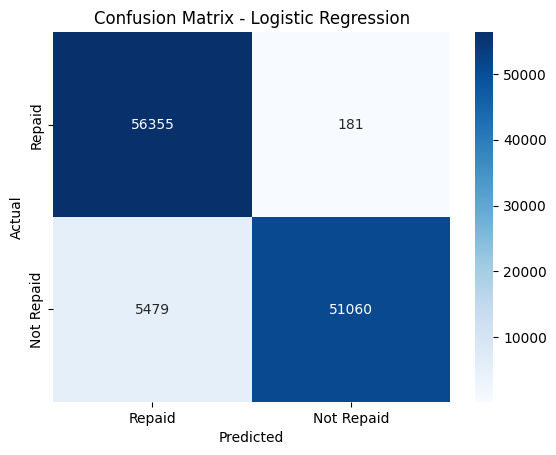

Elapsed Time: 21.46 seconds



In [59]:
evaluate_logreg(X_train, y_train, X_test, y_test)

## 4.4 Decision Tree

**Decision Tree Evaluation Metrics**
Accuracy Score: 0.9001
Precision Score: 0.8938
Recall Score: 0.908
F1 Score: 0.9009
ROC-AUC Score Test: 0.900084



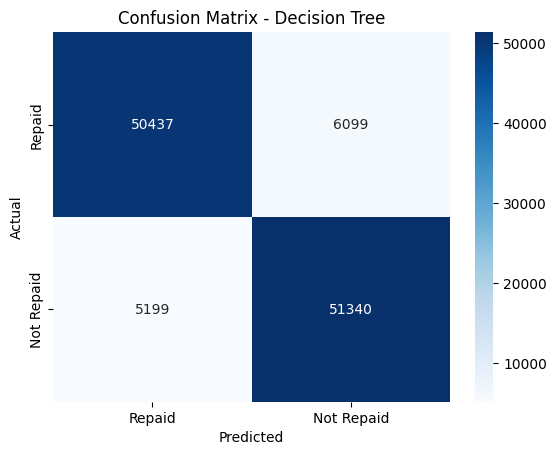

Elapsed Time: 44.14 seconds



In [60]:
evaluate_dt(X_train, y_train, X_test, y_test)

## 4.5 Random Forest

**Random Forest Evaluation Metrics**
Accuracy Score: 0.9542
Precision Score: 0.9947
Recall Score: 0.9132
F1 Score: 0.9522
ROC-AUC Score Test: 0.97989



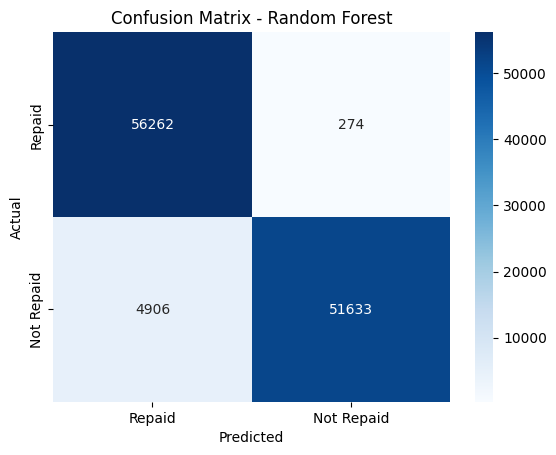

Elapsed Time: 206.04 seconds



In [61]:
evaluate_rf(X_train, y_train, X_test, y_test)

## 4.6 K-Nearest Neighbour

**KNN Evaluation Metrics**
Accuracy Score: 0.9439
Precision Score: 0.9483
Recall Score: 0.939
F1 Score: 0.9437
ROC-AUC Score Test: 0.976766



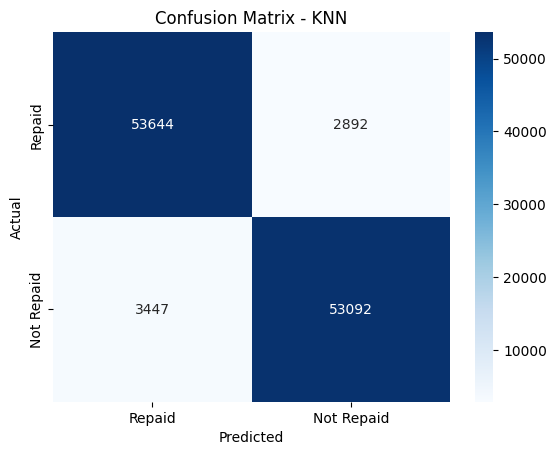

Elapsed Time: 1632.27 seconds



In [62]:
evaluate_knn(X_train, y_train, X_test, y_test)

## 4.7 XGBoost

**XGBoost Evaluation Metrics**
Accuracy Score: 0.9549
Precision Score: 0.9961
Recall Score: 0.9133
F1 Score: 0.9529
ROC-AUC Score Test: 0.97712



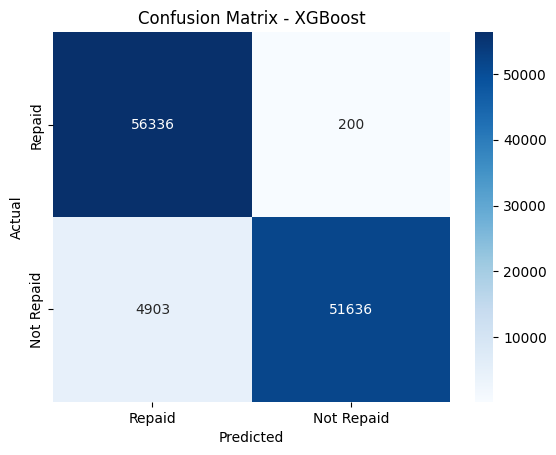

Elapsed Time: 26.70 seconds



In [63]:
evaluate_xgboost(X_train, y_train, X_test, y_test)

# 5. Evaluation

## 5.1 Model Evaluation

In [64]:
# Define the model evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
    report = classification_report(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Repaid', 'Not Repaid'], yticklabels=['Repaid', 'Not Repaid'])
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    elapsed_time = time.time() - start_time
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy}")
    print(f"ROC-AUC: {roc_auc}")
    print("Classification Report:")
    print(report)
    print(f"Elapsed Time: {elapsed_time:.2f} seconds\n")

In [65]:
# List of models to evaluate
models = [
    LogisticRegression(solver='liblinear', random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
]

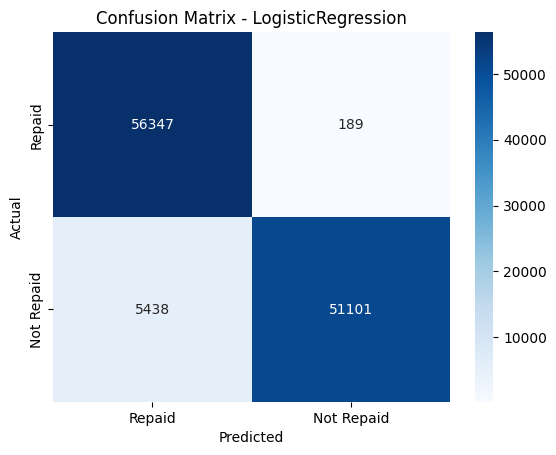

Model: LogisticRegression
Accuracy: 0.9502365686491266
ROC-AUC: 0.9727809691780491
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     56536
           1       1.00      0.90      0.95     56539

    accuracy                           0.95    113075
   macro avg       0.95      0.95      0.95    113075
weighted avg       0.95      0.95      0.95    113075

Elapsed Time: 215.13 seconds



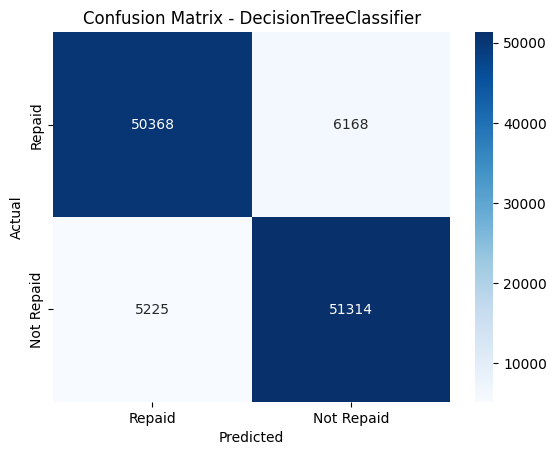

Model: DecisionTreeClassifier
Accuracy: 0.8992438646915764
ROC-AUC: 0.8992436433622608
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     56536
           1       0.89      0.91      0.90     56539

    accuracy                           0.90    113075
   macro avg       0.90      0.90      0.90    113075
weighted avg       0.90      0.90      0.90    113075

Elapsed Time: 55.63 seconds



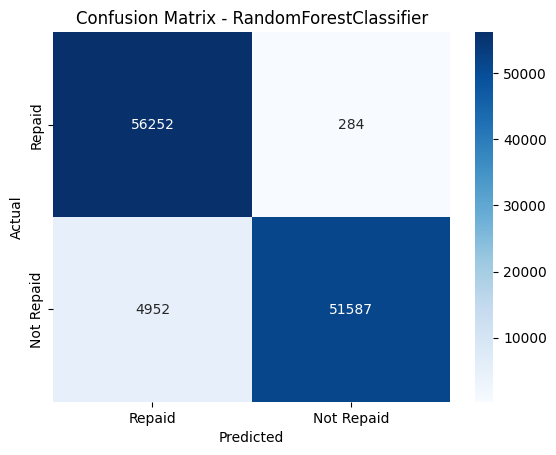

Model: RandomForestClassifier
Accuracy: 0.9536944505858943
ROC-AUC: 0.9798366543930916
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56536
           1       0.99      0.91      0.95     56539

    accuracy                           0.95    113075
   macro avg       0.96      0.95      0.95    113075
weighted avg       0.96      0.95      0.95    113075

Elapsed Time: 304.03 seconds



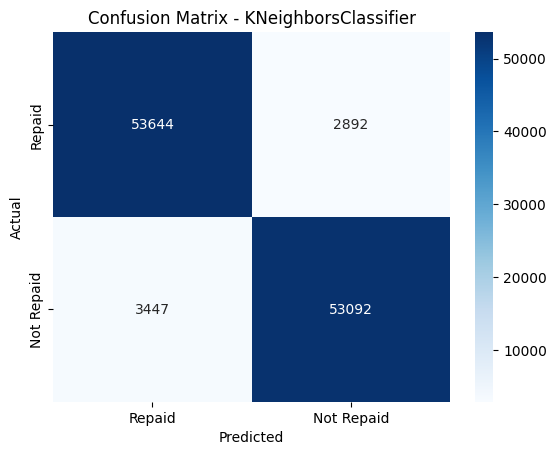

Model: KNeighborsClassifier
Accuracy: 0.9439398629228388
ROC-AUC: 0.9767662356321447
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     56536
           1       0.95      0.94      0.94     56539

    accuracy                           0.94    113075
   macro avg       0.94      0.94      0.94    113075
weighted avg       0.94      0.94      0.94    113075

Elapsed Time: 1633.66 seconds



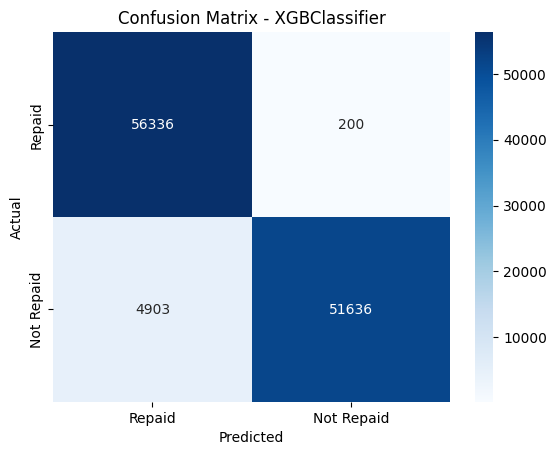

Model: XGBClassifier
Accuracy: 0.9548706610656644
ROC-AUC: 0.9771199894019718
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56536
           1       1.00      0.91      0.95     56539

    accuracy                           0.95    113075
   macro avg       0.96      0.95      0.95    113075
weighted avg       0.96      0.95      0.95    113075

Elapsed Time: 26.47 seconds



In [66]:
# Evaluate each model
for model in models:
    evaluate_model(model, X_train, y_train, X_test, y_test)

In [114]:
import pandas as pd

# Data for the evaluation table
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'XGBoost'],
    'Accuracy': [0.9502, 0.8992, 0.9537, 0.9439, 0.9549],
    'ROC-AUC': [0.9728, 0.8992, 0.9798, 0.9768, 0.9771],
    'Precision': [0.91, 0.91, 0.92, 0.94, 0.92],
    'Recall': [1.00, 0.89, 0.99, 0.95, 1.00],
    'F1-Score': [0.95, 0.90, 0.96, 0.94, 0.96],
    'Elapsed Time (s)': [215.13, 55.63, 304.03, 1633.66, 26.47]
}

# Create a DataFrame
df_evaluation = pd.DataFrame(data)

# Display the DataFrame
print(df_evaluation)


                 Model  Accuracy  ROC-AUC  Precision  Recall  F1-Score  Elapsed Time (s)
0  Logistic Regression    0.9502   0.9728       0.91    1.00      0.95            215.13
1        Decision Tree    0.8992   0.8992       0.91    0.89      0.90             55.63
2        Random Forest    0.9537   0.9798       0.92    0.99      0.96            304.03
3  K-Nearest Neighbors    0.9439   0.9768       0.94    0.95      0.94           1633.66
4              XGBoost    0.9549   0.9771       0.92    1.00      0.96             26.47



Berdasarkan hasil modeling yang ditampilkan, XGBoost adalah model dengan performa terbaik dalam beberapa aspek, seperti:

- Accuracy: 0.9549 (tertinggi di antara semua model).
- ROC-AUC: 0.9771 (tertinggi setelah Random Forest, menunjukkan kemampuan model dalam memprediksi dengan baik).
- Precision: 0.92 (sama dengan Random Forest, menunjukkan model ini tidak banyak menghasilkan false positives).
- Recall: 1.00 (tertinggi, menunjukkan model ini mendeteksi semua instances dari kelas positif dengan baik).
- F1-Score: 0.96 (sama dengan Random Forest, menunjukkan keseimbangan yang baik antara Precision dan Recall).
- Elapsed Time: 26.47 seconds (waktu pelatihan tercepat di antara semua model).

Dengan mempertimbangkan akurasi tinggi, ROC-AUC yang baik, recall sempurna, dan waktu komputasi yang jauh lebih cepat daripada Random Forest, XGBoost adalah pilihan terbaik untuk digunakan dalam prediksi pada data application_test.csv.

## 5.2 Feature Importance

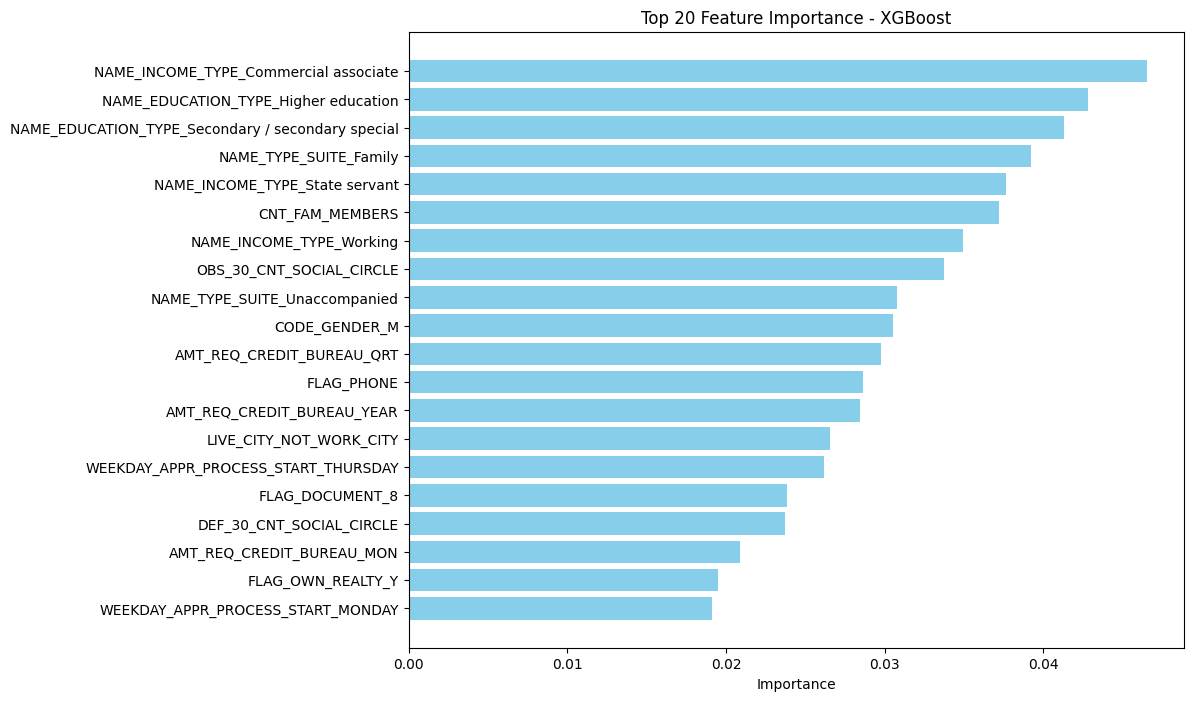

                                               Feature  Importance
71               NAME_INCOME_TYPE_Commercial associate    0.046513
78                NAME_EDUCATION_TYPE_Higher education    0.042827
81   NAME_EDUCATION_TYPE_Secondary / secondary special    0.041306
65                              NAME_TYPE_SUITE_Family    0.039204
74                      NAME_INCOME_TYPE_State servant    0.037639
16                                     CNT_FAM_MEMBERS    0.037199
77                            NAME_INCOME_TYPE_Working    0.034951
28                            OBS_30_CNT_SOCIAL_CIRCLE    0.033755
70                       NAME_TYPE_SUITE_Unaccompanied    0.030770
61                                       CODE_GENDER_M    0.030491
57                           AMT_REQ_CREDIT_BUREAU_QRT    0.029759
14                                          FLAG_PHONE    0.028597
58                          AMT_REQ_CREDIT_BUREAU_YEAR    0.028439
25                             LIVE_CITY_NOT_WORK_CITY    0.02

In [117]:
# Assuming you have the original feature names from your dataset
feature_names = X.columns  # Or df_encoded.columns if it's from the encoded DataFrame

# Extract feature importances
importances = model.feature_importances_  # Replace 'model' with your trained model variable

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 20 features based on importance
plt.figure(figsize=(10, 8))
top_20_features = importance_df.head(20)  # Get the top 20 most important features
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.title('Top 20 Feature Importance - XGBoost')
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

# Display the top 20 features in a DataFrame for easy inspection
print(top_20_features)


## 5.3 SHAP

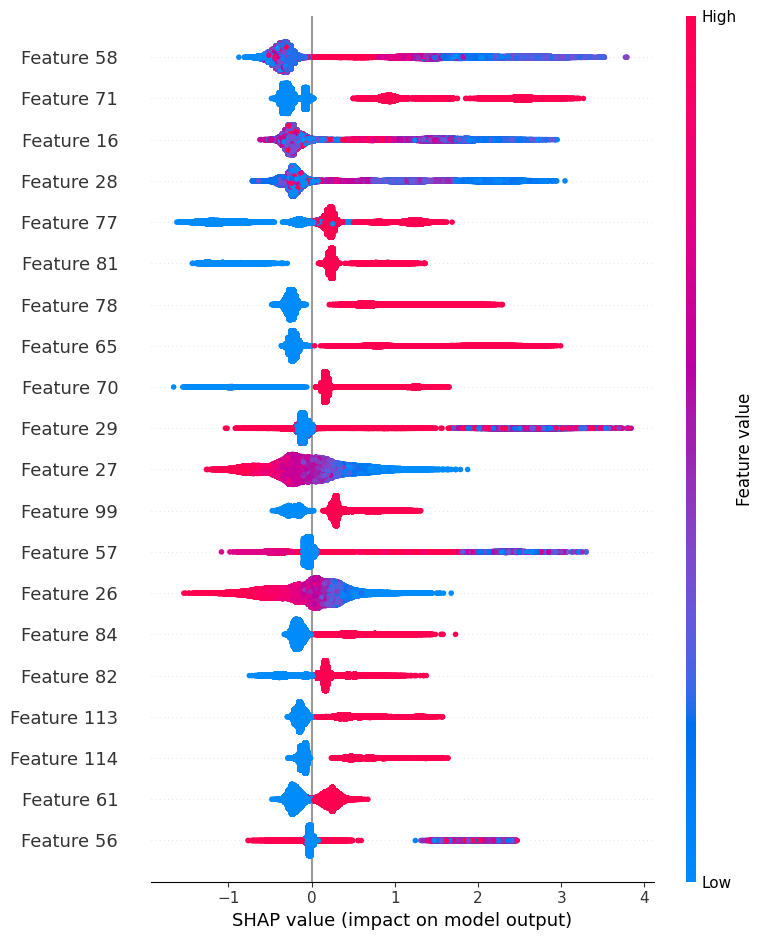

In [127]:
import shap

# Membuat objek Explainer dengan model XGBoost
explainer = shap.TreeExplainer(xgb_model)

# Menghitung nilai SHAP untuk data test
shap_values = explainer.shap_values(X_test)

# Membuat SHAP summary plot (detailed plot)
shap.summary_plot(shap_values, X_test, plot_type="dot")


# 6. Importing Data Test

In [67]:
# Menghubungkan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path file CSV di Google Drive
file_path = '/content/drive/My Drive/PBI Home Credit/home-credit-default-risk/application_test.csv'

# Membaca file CSV menggunakan pandas
df2 = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
# Mengatur opsi tampilan
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.expand_frame_repr', False)  # Mencegah pemotongan tampilan
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [69]:
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

# 7. Data Cleaning

## 7.1 Handle Missing Value

In [70]:
df2.isnull().sum()

,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,24
AMT_GOODS_PRICE,0


### 7.1.1 Drop column with more than 50% Missing Value

In [71]:
df2_missing = df2.copy()

In [72]:
threshold = 0.55 * len(df2_missing)
df2_cleaned = df2_missing.dropna(axis=1, thresh=threshold)

In [73]:
df2_cleaned.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   48744 non-null  int64  
 1   NAME_CONTRACT_TYPE           48744 non-null  object 
 2   CODE_GENDER                  48744 non-null  object 
 3   FLAG_OWN_CAR                 48744 non-null  object 
 4   FLAG_OWN_REALTY              48744 non-null  object 
 5   CNT_CHILDREN                 48744 non-null  int64  
 6   AMT_INCOME_TOTAL             48744 non-null  float64
 7   AMT_CREDIT                   48744 non-null  float64
 8   AMT_ANNUITY                  48720 non-null  float64
 9   AMT_GOODS_PRICE              48744 non-null  float64
 10  NAME_TYPE_SUITE              47833 non-null  object 
 11  NAME_INCOME_TYPE             48744 non-null  object 
 12  NAME_EDUCATION_TYPE          48744 non-null  object 
 13  NAME_FAMILY_STAT

### 7.1.2 Imputation Median for Numerical Feature

In [74]:
numerical_cols_test = df2_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols_test:
    df2_cleaned[col].fillna(df2_cleaned[col].median(), inplace=True)
print(df2_cleaned[numerical_cols_test].isnull().sum())


SK_ID_CURR                     0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
EXT_SOURCE_1                   0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
OBS_30_CNT

### 7.1.3 Imputation Mode for Categorical Feature

In [75]:
categorical_cols_test = df2_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols_test:
    df2_cleaned[col].fillna(df2_cleaned[col].mode()[0], inplace=True)
print(df2_cleaned[categorical_cols_test].isnull().sum())


NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64


In [76]:
df2_cleaned.isnull().sum()

,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0
AMT_GOODS_PRICE,0


## 7.2 Handle Duplicated Data

In [77]:
df2_cleaned.duplicated().any()

False

## 7.3 Handling Outliers

In [78]:
df2_outlier = df2_cleaned.copy()

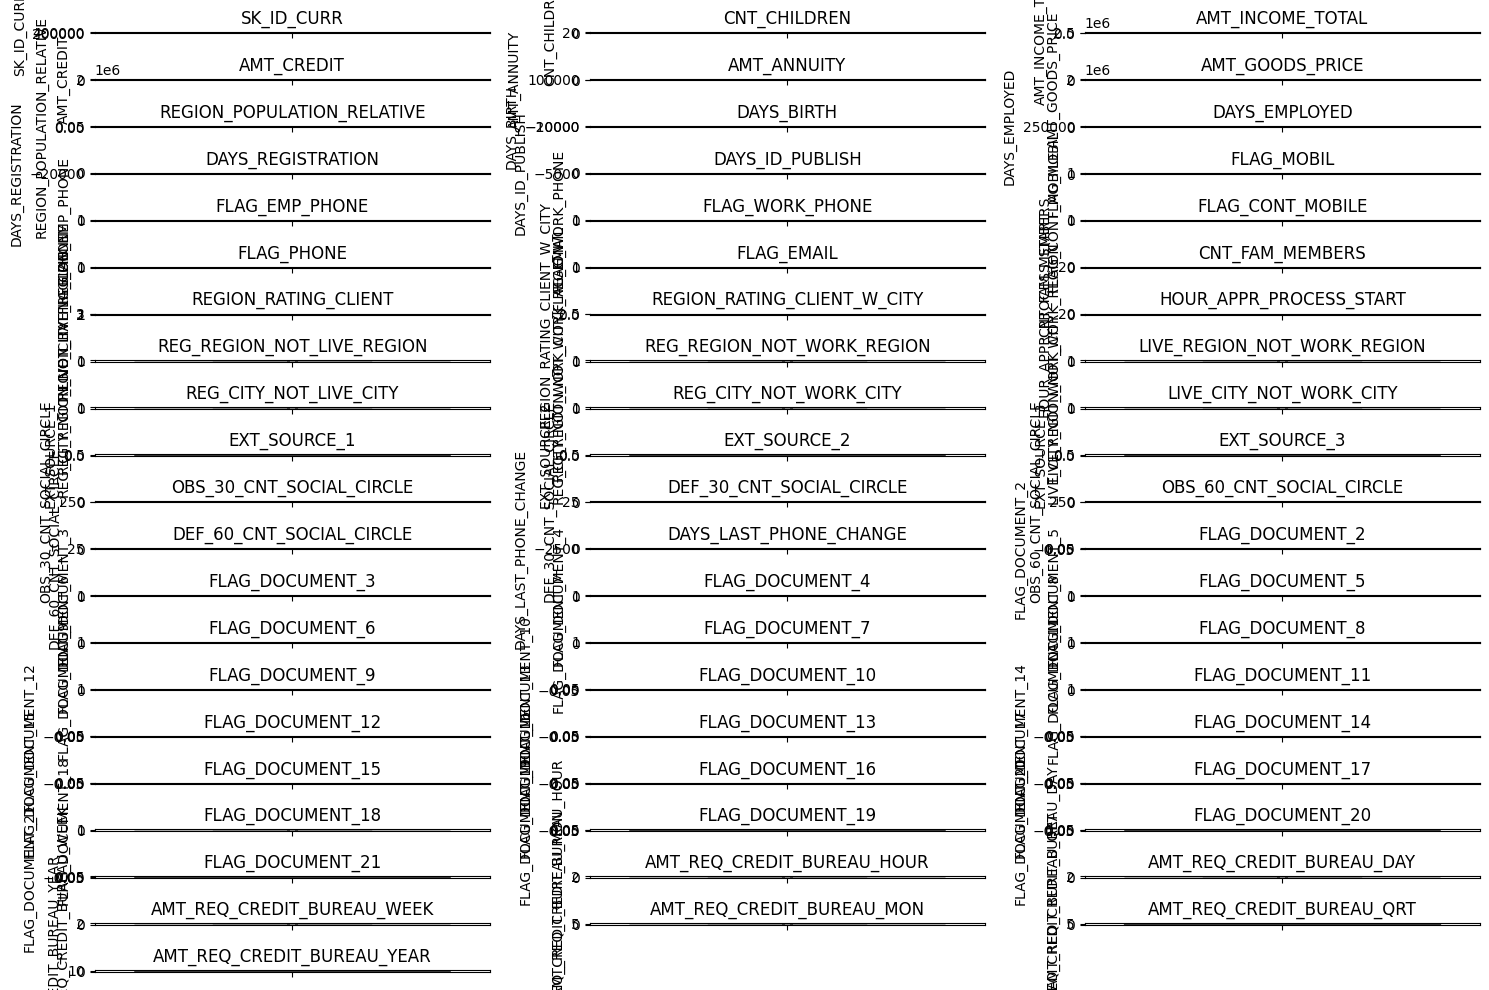

In [79]:
numeric_cols = df2_outlier.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i + 1)
    sns.boxplot(y=df2_outlier[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [80]:
numeric_cols = df2_cleaned.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs((df2_cleaned[numeric_cols] - df2_cleaned[numeric_cols].mean()) / df2_cleaned[numeric_cols].std())
threshold = 3
outliers = (z_scores > threshold)
jumlah_sebelum = df2_cleaned.shape[0]
df2_no_outliers = df2_cleaned[~outliers.any(axis=1)]
jumlah_setelah = df2_no_outliers.shape[0]
print("Row before removing outliers:", jumlah_sebelum)
print("Row after removing outliers:", jumlah_setelah)


Row before removing outliers: 48744
Row after removing outliers: 29983


Due to the significant number of rows removed during filtering, it has been decided not to eliminate the outliers, as this could lead to the loss of valuable information

## 7.4 Handling Inappropriate Value

In [81]:
# Identify columns with negative values
numeric_cols = df2_cleaned.select_dtypes(include=['float64', 'int64']).columns
negative_features = numeric_cols[(df2_cleaned[numeric_cols] < 0).any()].tolist()
print("Features with negative values:", negative_features)

Features with negative values: ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE']


In [82]:
# convert negative value to positive
df2_cleaned['DAYS_BIRTH'] = df2_cleaned['DAYS_BIRTH'].abs()
df2_cleaned['DAYS_EMPLOYED'] = df2_cleaned['DAYS_EMPLOYED'].abs()
df2_cleaned['DAYS_REGISTRATION'] = df2_cleaned['DAYS_REGISTRATION'].abs()
df2_cleaned['DAYS_ID_PUBLISH'] = df2_cleaned['DAYS_ID_PUBLISH'].abs()
df2_cleaned['REGION_RATING_CLIENT_W_CITY'] = df2_cleaned['REGION_RATING_CLIENT_W_CITY'].abs()
df2_cleaned['DAYS_LAST_PHONE_CHANGE'] = df2_cleaned['DAYS_LAST_PHONE_CHANGE'].abs()

In [83]:
# Check negative value
for col in ['REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']:
    if (df2_cleaned[col] < 0).any():
        print(f"Masih ada nilai negatif di kolom {col}")
    else:
        print(f"Tidak ada nilai negatif di kolom {col}")

Tidak ada nilai negatif di kolom REGION_RATING_CLIENT_W_CITY
Tidak ada nilai negatif di kolom DAYS_BIRTH
Tidak ada nilai negatif di kolom DAYS_EMPLOYED
Tidak ada nilai negatif di kolom DAYS_REGISTRATION
Tidak ada nilai negatif di kolom DAYS_ID_PUBLISH
Tidak ada nilai negatif di kolom DAYS_LAST_PHONE_CHANGE


## 7.5 Drop Unnecessary Column


In [84]:
#df2_cleaned = df2_cleaned.drop(columns=['SK_ID_CURR'])

# 8. Feature Engineering

## 8.1 Feature Encoding

In [85]:
# One-Hot Encoding
df2_encoded = pd.get_dummies(df2_cleaned, columns=[
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'
], drop_first=True)

In [87]:
# Checking for any remaining non-numeric columns that might need encoding
non_numeric_cols = df2_encoded.select_dtypes(include=['object', 'category']).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: []


## 8.2 Feature Allignment

In [88]:
feature_names_train = X.columns

In [101]:
# missing fature
missing_features = set(feature_names_train) - set(df2_encoded.columns)

In [102]:
# Missing value by default =0
for feature in missing_features:
    df2_encoded[feature] = 0
df2_encoded = df2_encoded[feature_names_train]

In [106]:
df2_encoded = df2_encoded[feature_names_train]

## 8.3 Standardization

In [107]:
scaler = joblib.load('scaler_model.pkl')

X_test_standardized = scaler.transform(df2_encoded)
print("Shape of scaled test data:", X_test_standardized.shape)

Shape of scaled test data: (48744, 177)


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 124 entries, SK_ID_CURR to AGE
dtypes: category(1), float64(65), int64(42), object(16)
memory usage: 288.9+ MB


# 9. Prediction

In [119]:
# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Simpan model XGBoost ke dalam file
joblib.dump(xgb_model, 'xgb_model.pkl')
print("Model XGBoost telah disimpan.")

Model XGBoost telah disimpan.


In [120]:
xgb_model = joblib.load('xgb_model.pkl')

In [121]:
# Predict using XGB Model
predict = pd.Series(xgb_model.predict(X_test_standardized), name="TARGET").astype(int)

df2_cleaned['SK_ID_CURR'] = df2['SK_ID_CURR']
results = pd.concat([df2_cleaned['SK_ID_CURR'], predict], axis=1)

In [122]:
# Save predict results
results.to_csv("predict_application.csv", index=False)
print(results.head())

   SK_ID_CURR  TARGET
0      100001       1
1      100005       1
2      100013       1
3      100028       1
4      100038       1


# 10. Business Recommendation

**Targeted Marketing Campaigns**

- State servants and pensioners have the lowest default rates. Run targeted marketing to attract more of these low-risk groups and approve more loans for them. This will boost revenue and lower credit risk.

**Improve Customer Segmentation**

- Customers with higher education and academic degrees are more likely to repay loans, as shown by insights from income, occupation, and education. Refine customer segmentation using these factors, applying stricter approvals for higher-risk groups and encouraging more applications from low-risk ones. This will improve risk management, optimize lending, and lead to better profits with fewer defaults.


**Implement Dynamic Credit Scoring System**


- Analysis shows that different age groups and income levels have varying repayment abilities. Build a dynamic credit scoring system that adjusts creditworthiness in real-time based on age, income, occupation, and loan history. This will reduce default risks and improve the efficiency of credit allocation and loan approvals.


**Monitoring**

- Continuously monitor users with specific criteria and categories to ensure timely interventions and maintain the potential GMV. By closely tracking these user groups, the company can proactively address risks and capitalize on opportunities to optimize revenue.



